In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=1e-3, y_width=.5e-3, dy=.15e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=0, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6, dy=.15e-3)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=512)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, downstream_YAG, IP,crystal1,crystal2,crystal3,crystal4, slit]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 359.96254102061795 microns
FWHM in y: 359.96254102061795 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415447013748533
5.415447013748533
b 1.00
b 1.64
b 1.00
b 1.64
0.6102211874545929
24.86894226347203
14.869889912414962
after mr1l0: 0.00
after mr2l0: 0.00
after c1: -0.69
after c2: 0.00
after c3: 0.69
after c4: 0.00
(array([-0.23255746,  0.        ,  0.03319926]), array([0.02406745, 0.        , 0.99971034]))
1.3620401788281523e-05


In [4]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit_cc = optics.Slit('entrance', z=989, x_width=1e-3, y_width=.5e-3, dy=-.35e-3)

crystal1cc = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=0,pol='p')

# should be orientation 0
crystal2cc = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=0, 
                          orientation=2,pol='p')



crystal3cc = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4cc = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=0, 
                          asym_type='emergence', orientation=0,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

prism = optics.Prism('p1', x_width=1e-3, y_width=1e-3, slope=4.3, orientation=3, z=990.13)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)

slit_cc = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=50e-3, dy=0)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP_cc = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG_cc = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG_cc = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=512)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices_cc = [mr1l0,mr2l0,entrance_slit_cc,upstream_YAG_cc, downstream_YAG_cc, 
              IP_cc,crystal1cc,crystal2cc,crystal3cc,crystal4cc,slit_cc,prism]
# devices = devices + crl_list

XPP_cc = beamline.Beamline(devices_cc)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 359.96254102061795 microns
FWHM in y: 359.96254102061795 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415447013748533
5.415447013748533
b 1.00
b 1.00
b 1.00
b 1.00
0.6102211874545929
24.86894226347203
14.869889912414962
after mr1l0: 0.00
after mr2l0: 0.00
after c1: 0.69
after c2: 0.00
after c3: -0.69
after c4: 0.00
(array([-0.23255746,  0.        ,  0.03319926]), array([0.02406745, 0.        , 0.99971034]))
1.3620401788281523e-05


In [5]:
print(crystal1cc.alpha)
print(crystal1cc.beta0)

0.346781770654042
0.3467817706540418


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: -0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: -0.00
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.00
zx: 134.17
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth 0.00 mrad
slit
zx: 50.04
zy: 360.21
azimuth 0.00 mrad
drift9
delta z: 0.00


<IPython.core.display.Javascript object>


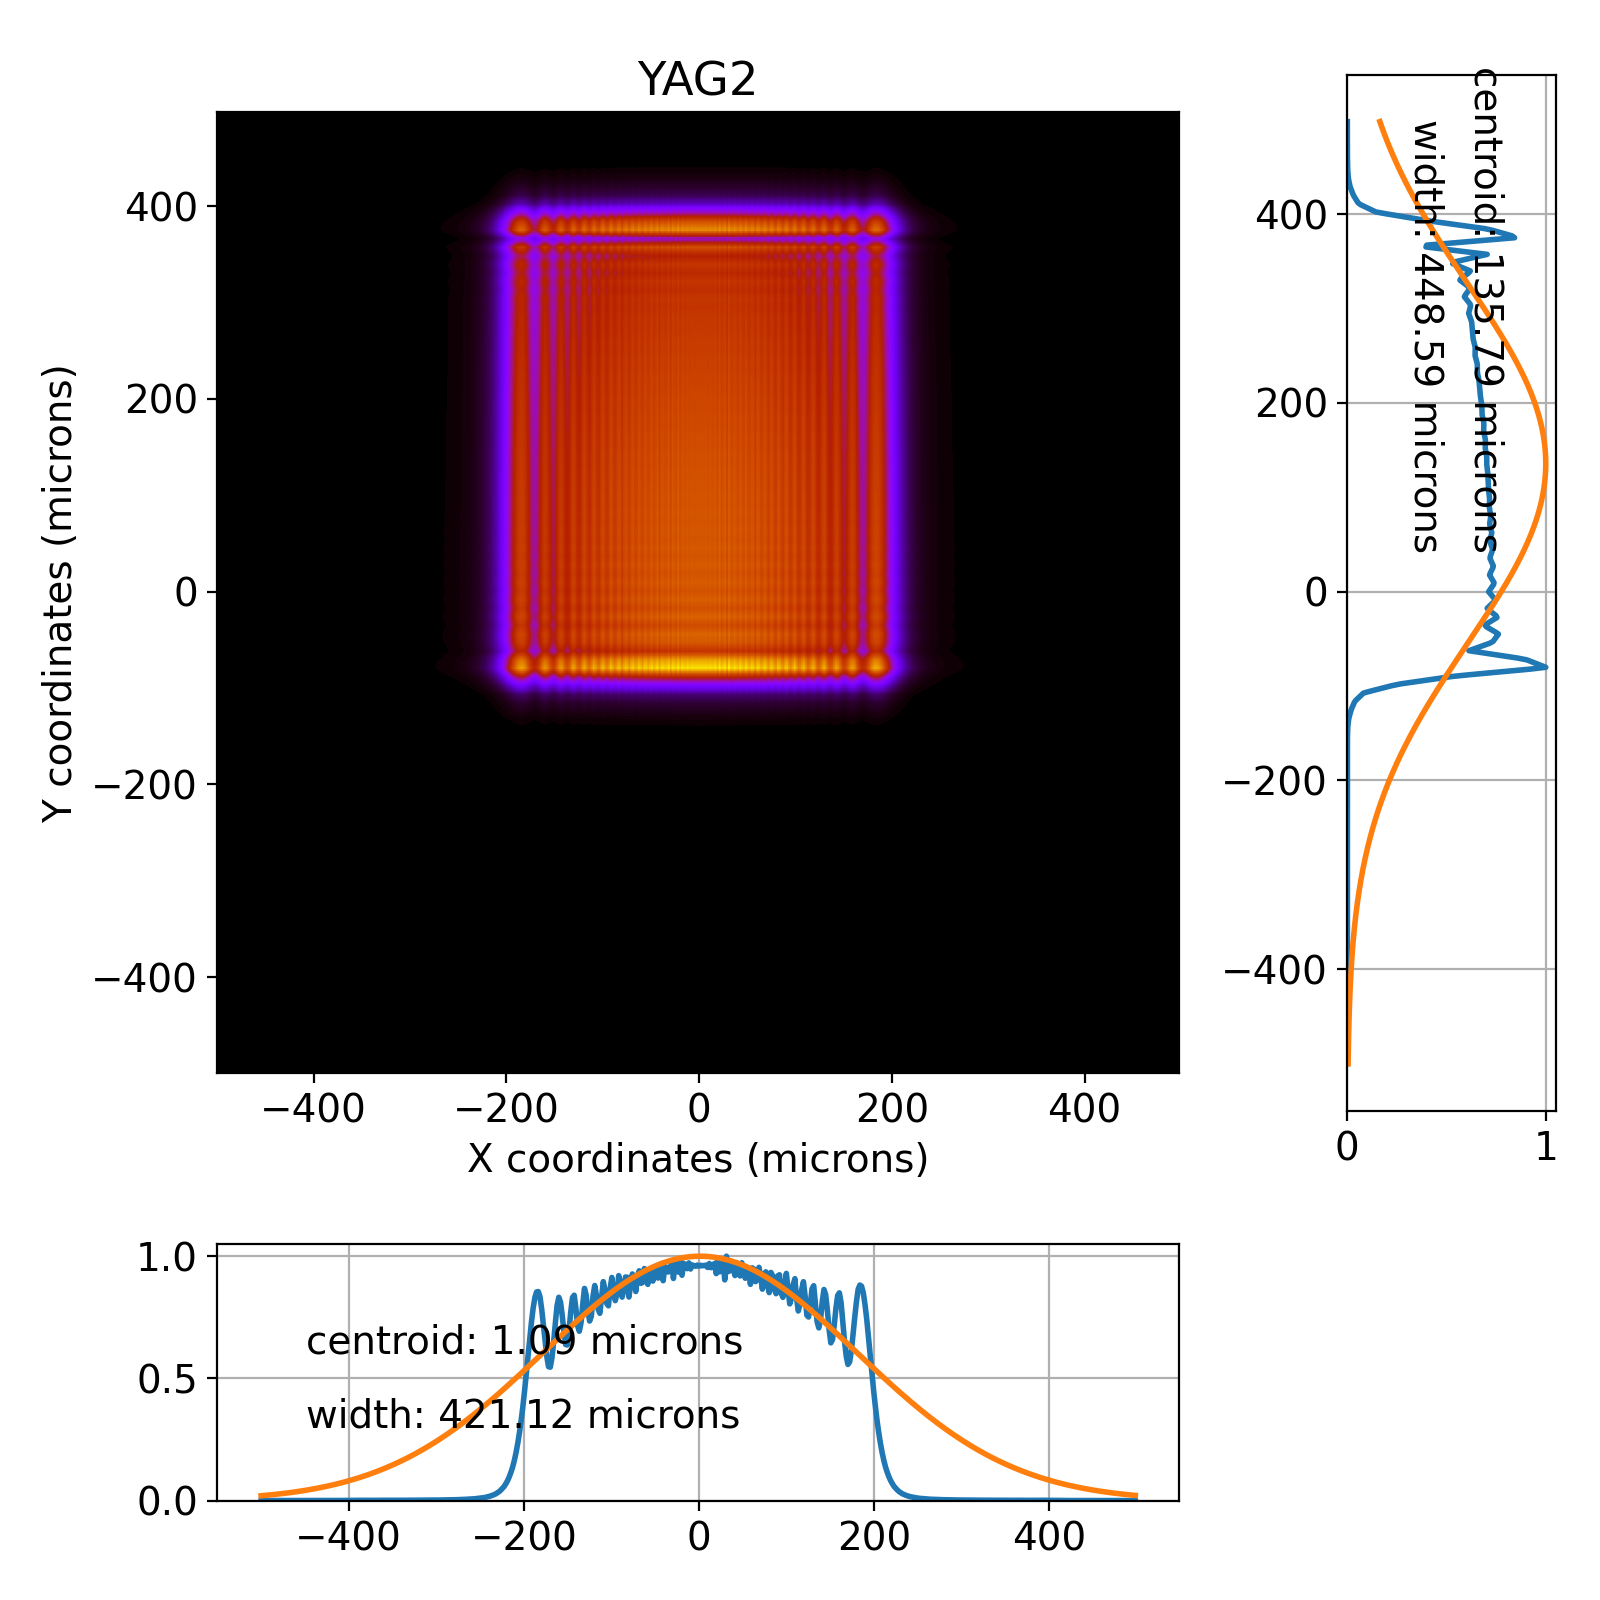

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: -0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: -0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: -0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.00
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
p1
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.21
zy: 360.21
az

<IPython.core.display.Javascript object>


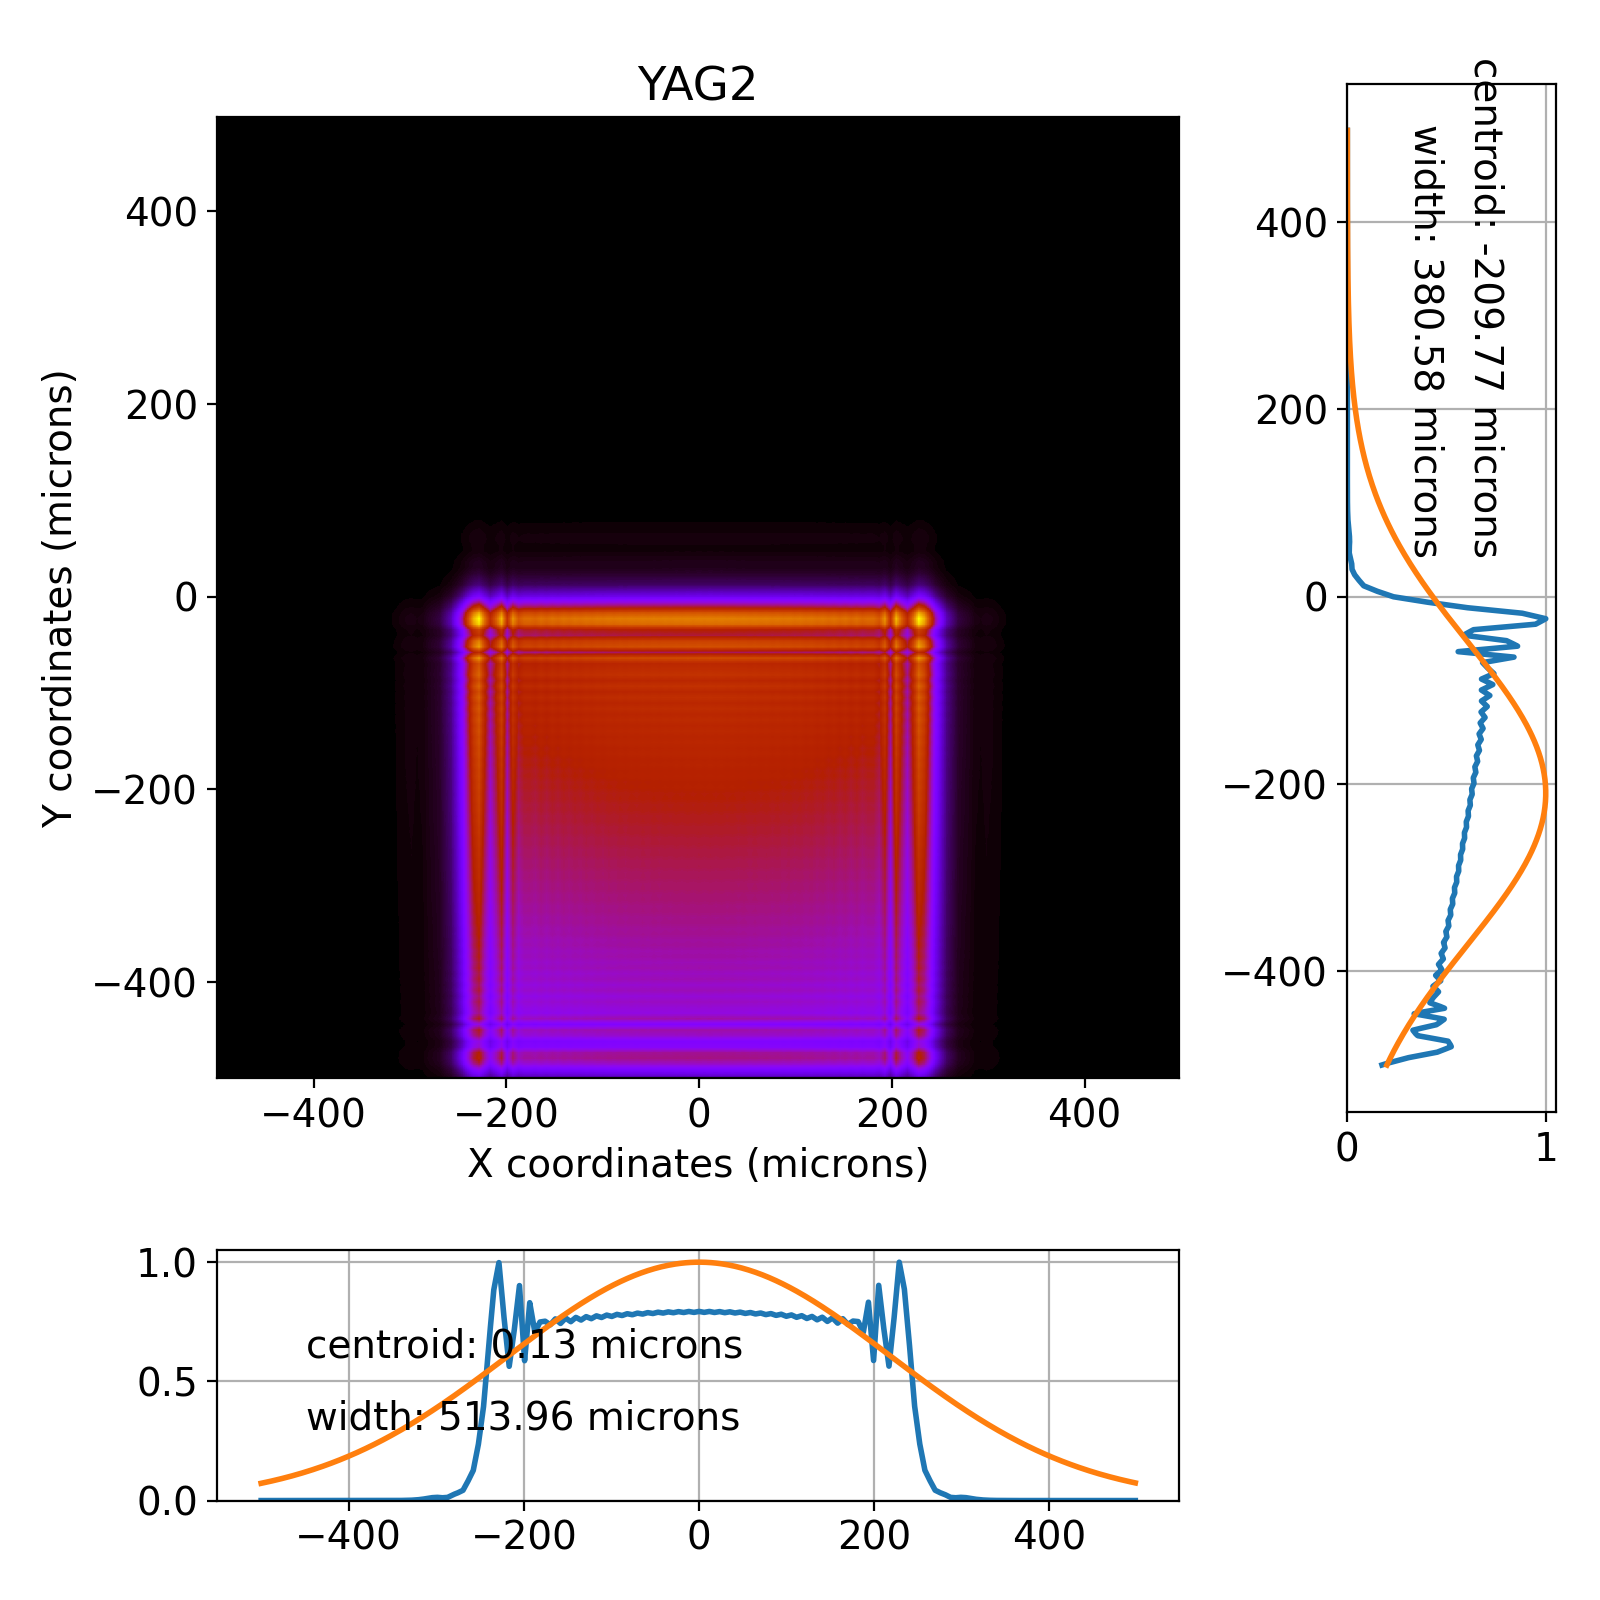

In [6]:
b2 = XPP.propagate_beamline(b1)
# XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()

b3 = XPP_cc.propagate_beamline(b1)
XPP_cc.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
# plt.figure()
# plt.plot(np.abs(b2.wavex))

In [7]:
beam_params['photonEnergy'] = 9500

pulse_cc = beam.Pulse(beam_params=beam_params.copy(), tau=10, time_window=500)

beam_params['photonEnergy'] = 9500

pulse_vcc = beam.Pulse(beam_params=beam_params.copy(), tau=10, time_window=500)

In [8]:
pulse_vcc.propagate(beamline=XPP, screen_names=['YAG1','YAG2'])
pulse_cc.propagate(beamline=XPP_cc, screen_names=['YAG1','YAG2'])

FWHM in x: 359.980117848771 microns
FWHM in y: 359.980117848771 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415181951692525
5.415181951692525
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: -3.13
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.31
zx: 134.16
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: 3.00
x stays

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.16
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth -0.01 mrad
slit
zx: 50.04
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth -0.01 mrad
IP
zx: 50.92
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
x stays unfocused
y remains focused
zx: 56.46
zy: 366.63
azimuth -0.01 mrad
YAG2
zx: 56.46
zy: 366.63
azimuth -0.01 mrad
FWHM in x: 359.977900856586 microns
FWHM in y: 359.977900856586 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415215382942833
5.415215382942833
mr1

zx: 50.92
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
x stays unfocused
y remains focused
zx: 56.46
zy: 366.63
azimuth -0.01 mrad
YAG2
zx: 56.46
zy: 366.63
azimuth -0.01 mrad
FWHM in x: 359.97536718479085 microns
FWHM in y: 359.97536718479085 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415253590086042
5.415253590086042
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth 0.00

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth -0.00 mrad
slit
zx: 50.04
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth -0.00 mrad
IP
zx: 50.92
zy: 361.09
azimuth -0.00 mrad
drift10
delta z: -0.00
x stays unfocused
y remains fo

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.06
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 134.15
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.58 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth -0.00 mrad
slit
zx: 50.04
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth -0.00 mrad
IP
zx: 50.92
zy: 361.09
azimuth -0.00 mrad
drift10
delta z: -0.00
x stays unfocused
y remains focused
zx: 56.46
zy: 366.63
azimuth -0.00 mrad
YAG2
zx: 56.46
zy: 366.63
azimuth -0.00 mrad
FWHM in x: 359.9699832510771 microns
FWHM in y: 359.9699832510771 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 

zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth -0.00 mrad
slit
zx: 50.04
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth -0.00 mrad
IP
zx: 50.92
zy: 361.09
azimuth -0.00 mrad
drift10
delta z: -0.00
x stays unfocused
y remains focused
zx: 56.46
zy: 366.63
azimuth -0.00 mrad
YAG2
zx: 56.46
zy: 366.63
azimuth -0.00 mrad
FWHM in x: 359.96744969114013 microns
FWHM in y: 359.96744969114013 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415372987408567
5.415372987408567
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
z

FWHM in x: 359.9649161669961 microns
FWHM in y: 359.9649161669961 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415411194551776
5.415411194551776
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.06
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.17
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
x stay

x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth -0.00 mrad
slit
zx: 50.04
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth -0.00 mrad
IP
zx: 50.92
zy: 361.09
azimuth -0.00 mrad
drift10
delta z: -0.00
x stays unfocused
y remains focused
zx: 56.46
zy: 366.63
azimuth -0.00 mrad
YAG2
zx: 56.46
zy: 366.63
azimuth -0.00 mrad
FWHM in x: 359.9630160473769 microns
FWHM in y: 359.9630160473769 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415439849909182
5.415439849909182
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth

FWHM in x: 359.96048258586904 microns
FWHM in y: 359.96048258586904 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4154780570523915
5.4154780570523915
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.06
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x s

zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth 0.00 mrad
slit
zx: 50.04
zy: 360.21
azimuth 0.00 mrad
drift9
delta z: 0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth 0.00 mrad
IP
zx: 50.92
zy: 361.09
azimuth 0.00 mrad
drift10
delta z: 0.00
x stays unfocused
y remains focused
zx: 56.46
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 56.46
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.9576324844541 microns
FWHM in y: 359.9576324844541 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4155210400885
5.4155210400885
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
z

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.06
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 134.16
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.96
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y stays unfocused
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth 0.00 mrad
slit
zx: 50.04
zy: 360.21
azimuth 0.00 mrad
drift9
delta z: 0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth 0.00 mrad
IP
zx: 50.92
zy: 361.09
azimuth 0.00 mrad
drift10
delta z: 0.00
x stays unfocused
y remains focused
zx: 56.46
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 56.46
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.95573244200904 microns
FWHM in y: 359.95573244200904 microns
FWHM Divergence (x): 3.3 μ

zx: 56.46
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 56.46
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.9531990833982 microns
FWHM in y: 359.9531990833982 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415587902589116
5.415587902589116
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimuth 693.57 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth 0.00 mrad
slit
zx: 50.04
zy: 360.21
azimuth 0.00 mrad
drift9
delta z: 0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth 0.00 mrad
IP
zx: 50.92
zy: 361.09
azimuth 0.00 mrad
drift10
delta z: 0.00
x stays unfocused
y remains focused
zx: 56.47
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 56.47
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.95034909773995 microns
FWHM in y: 359.95034909773995 microns


zx: 56.47
zy: 366.63
azimuth 0.01 mrad
YAG2
zx: 56.47
zy: 366.63
azimuth 0.01 mrad
FWHM in x: 359.94781581517947 microns
FWHM in y: 359.94781581517947 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415669092768432
5.415669092768432
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: -0.01
zx: 134.18
zy: 360.13
azimut

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.06
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 134.17
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: -0.01
zx: 134.19
zy: 360.13
azimuth 693.56 mrad
c4
zx: 49.97
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zx: 50.04
zy: 360.21
azimuth 0.01 mrad
slit
zx: 50.04
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
x stays unfocused
y remains focused
zx: 50.92
zy: 361.09
azimuth 0.01 mrad
IP
zx: 50.92
zy: 361.09
azimuth 0.01 mrad
drift10
delta z: 0.00
x stays unfocused
y remains focused
zx: 56.47
zy: 366.63
azimuth 0.01 mrad
YAG2
zx: 56.47
zy: 366.63
azimuth 0.01 mrad
FWHM in x: 359.9449659150756 microns
FWHM in y: 359.9449659150756 microns
FW

zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
p1
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
drift9
delta z: -0.00
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
drift11
delta z: -0.00
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.977900856586 microns
FWHM in y: 359.977900856586 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415215382942833
5.415215382942833
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mra

FWHM in x: 359.97536718479085 microns
FWHM in y: 359.97536718479085 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415253590086042
5.415253590086042
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 36

zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
p1
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
drift9
delta z: -0.00
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
drift11
delta z: -0.00
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.9725168468079 microns
FWHM in y: 359.9725168468079 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415296573122151
5.415296573122151
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0

zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.9699832510771 microns
FWHM in y: 359.9699832510771 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415334780265358
5.415334780265358
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
p1
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
drift9
delta z: -0.00
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
drift11
delta z: -0.00
zx: 366.63
zy: 366.63
azimuth 0.00

zx: 360.21
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
drift11
delta z: -0.00
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.96459947899484 microns
FWHM in y: 359.96459947899484 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415415970444676
5.415415970444676
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimu

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
p1
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
drift9
delta z: -0.00
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
drift11
delta z: -0.00
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.961749312149 microns
FWHM in y: 359.9617493121

zx: 360.21
zy: 360.21
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
drift11
delta z: -0.00
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.9592158685368 microns
FWHM in y: 359.9592158685368 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415497160623994
5.415497160623994
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth

FWHM in x: 359.95668246071506 microns
FWHM in y: 359.95668246071506 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4155353677672045
5.4155353677672045
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 

FWHM in x: 359.9541490886833 microns
FWHM in y: 359.9541490886833 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415573574910412
5.415573574910412
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 360.

zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
p1
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
drift9
delta z: -0.00
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
drift11
delta z: -0.00
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.95129908792677 microns
FWHM in y: 359.95129908792677 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41561655794652
5.41561655794652
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 m

zx: 366.63
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.9487657919458 microns
FWHM in y: 359.9487657919458 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415654765089729
5.415654765089729
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth 

zx: 360.00
zy: 360.00
azimuth 693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth 693.56 mrad
c2
zx: 360.02
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.00
zx: 360.12
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.12
zy: 360.12
azimuth -693.56 mrad
drift7
delta z: 0.00
zx: 360.13
zy: 360.13
azimuth -693.56 mrad
c4
zx: 360.13
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: 0.00
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
p1
zx: 360.14
zy: 360.14
azimuth 0.00 mrad
drift9
delta z: -0.00
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.21
zy: 360.21
azimuth 0.00 mrad
drift10
delta z: -0.00
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.09
zy: 361.09
azimuth 0.00 mrad
drift11
delta z: -0.00
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
YAG2
zx: 366.63
zy: 366.63
azimuth 0.00 mrad
FWHM in x: 359.9459158767445 microns
FWHM in y: 359.9459158767445 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415697748125838
5.415697748125838
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mr

<IPython.core.display.Javascript object>


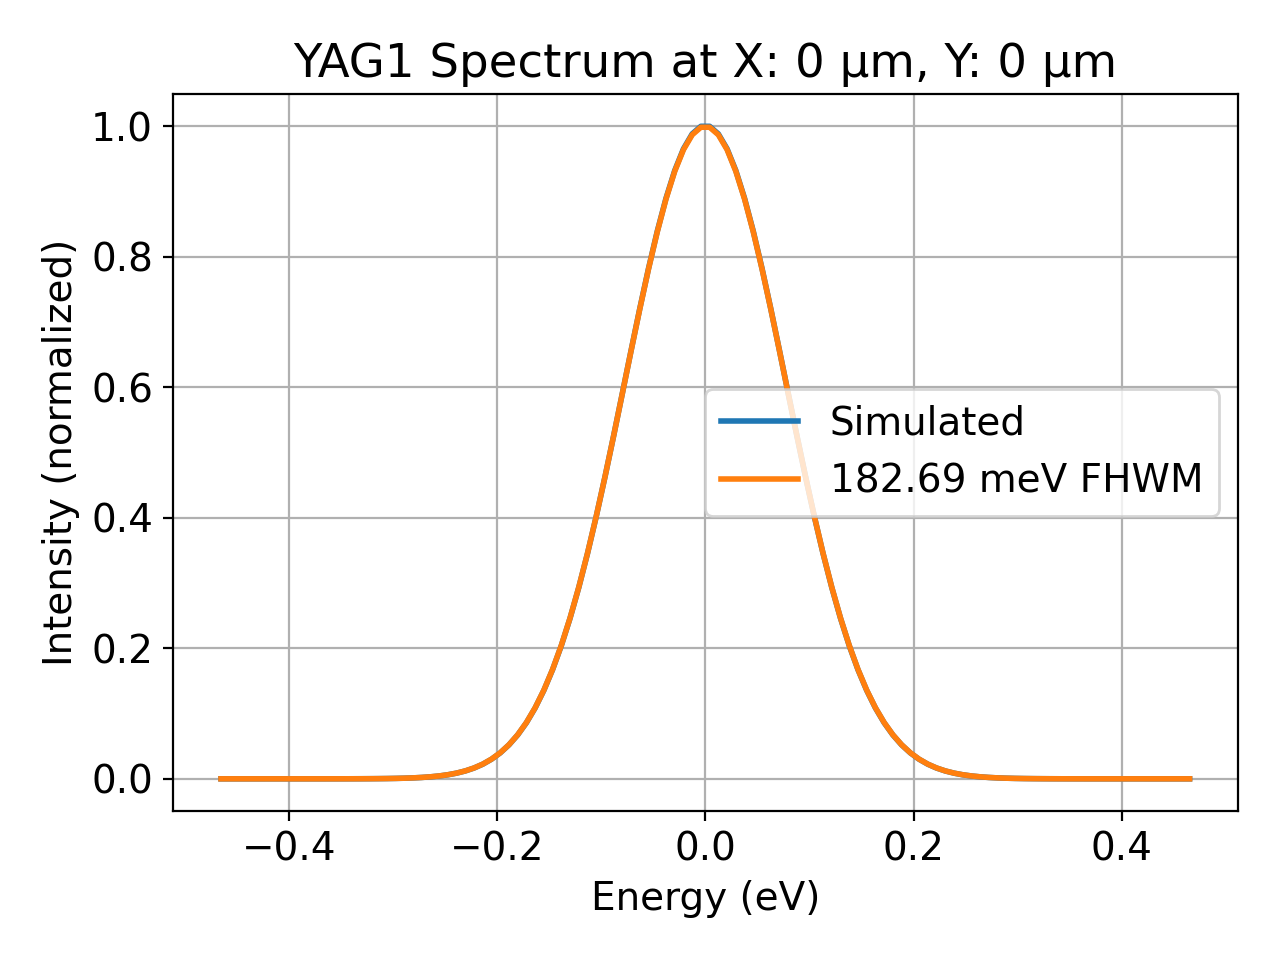

<IPython.core.display.Javascript object>


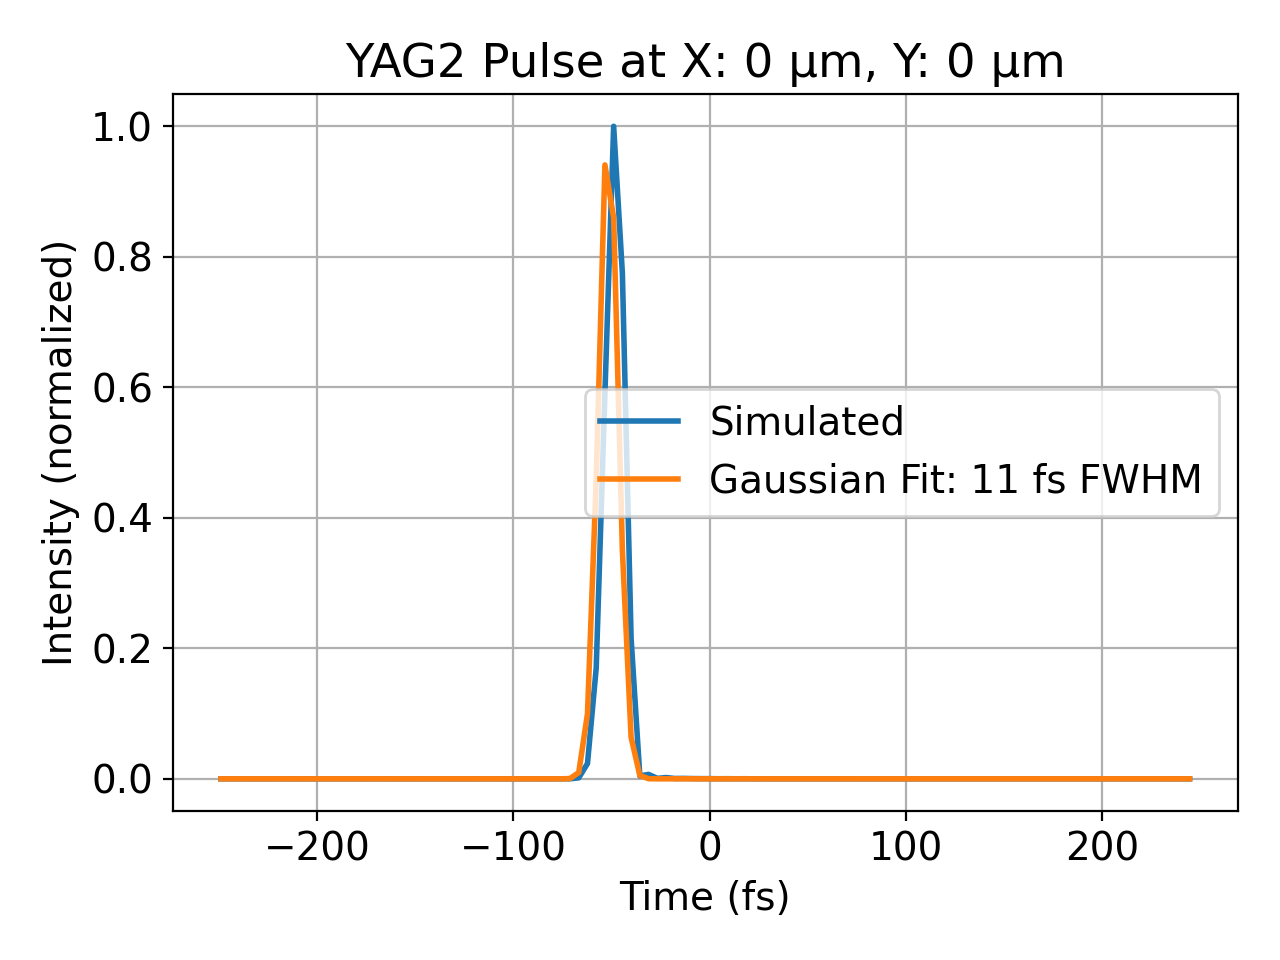

In [9]:
figpath = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'

pulse_cc.plot_spectrum('YAG1')
# plt.savefig(figpath+'cc_initial_spectrum.png')
pulse_cc.plot_pulse('YAG2',shift=-110)
# plt.savefig(figpath+'cc_initial_pulse.png')

In [19]:
pulse_combine = pulse_cc.add_pulse(pulse_vcc,147)

In [11]:
two_pulse_combine = pulse_combine.add_pulse(pulse_combine, 20)

<IPython.core.display.Javascript object>


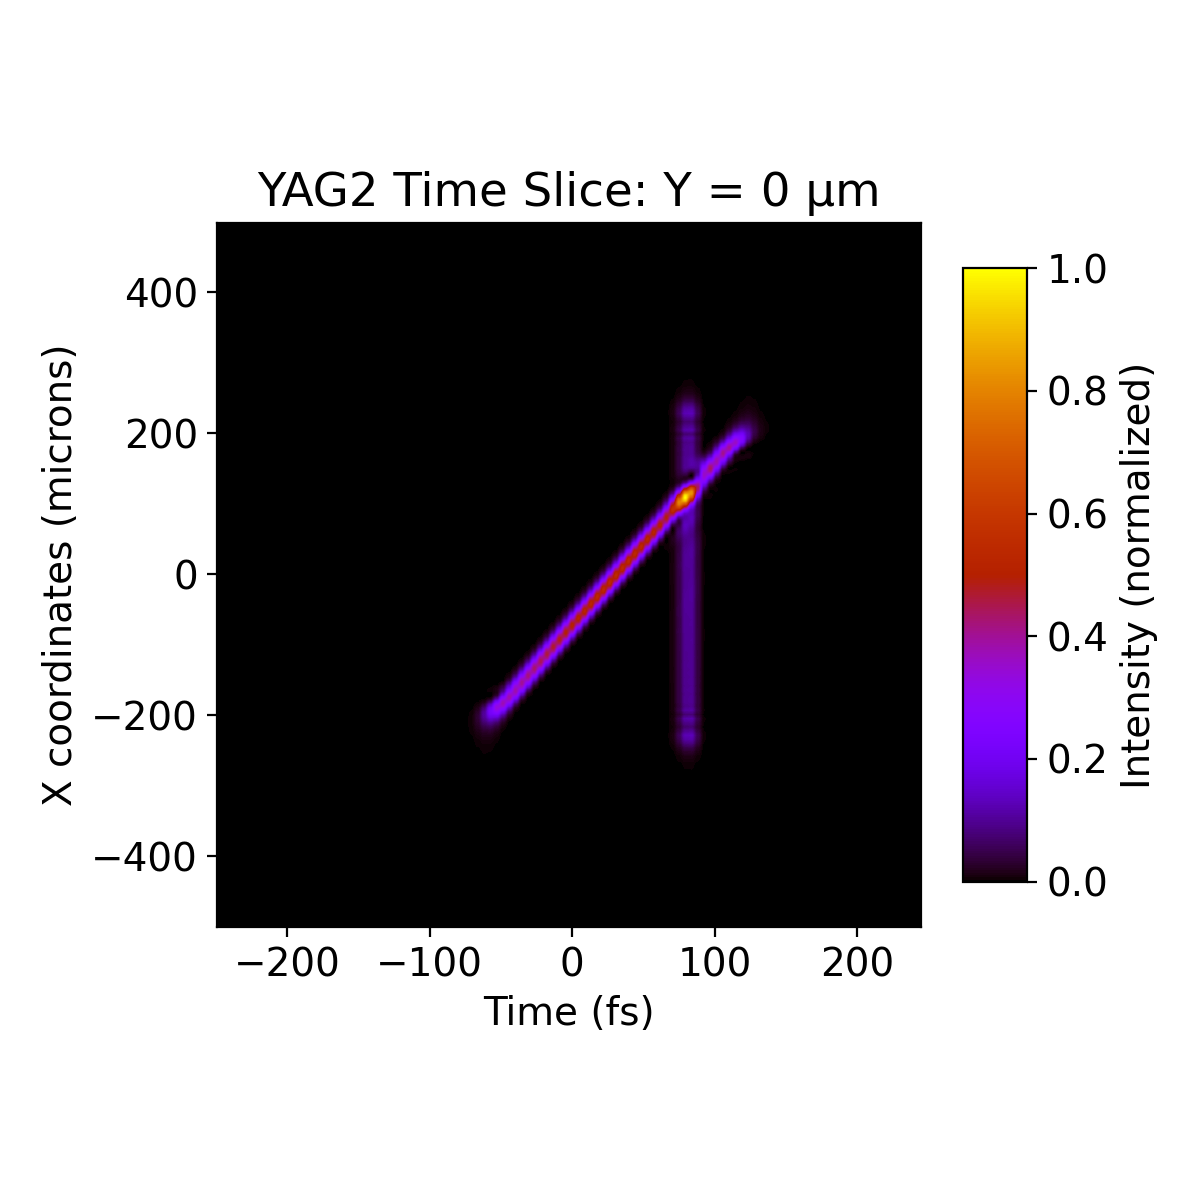

256


<IPython.core.display.Javascript object>


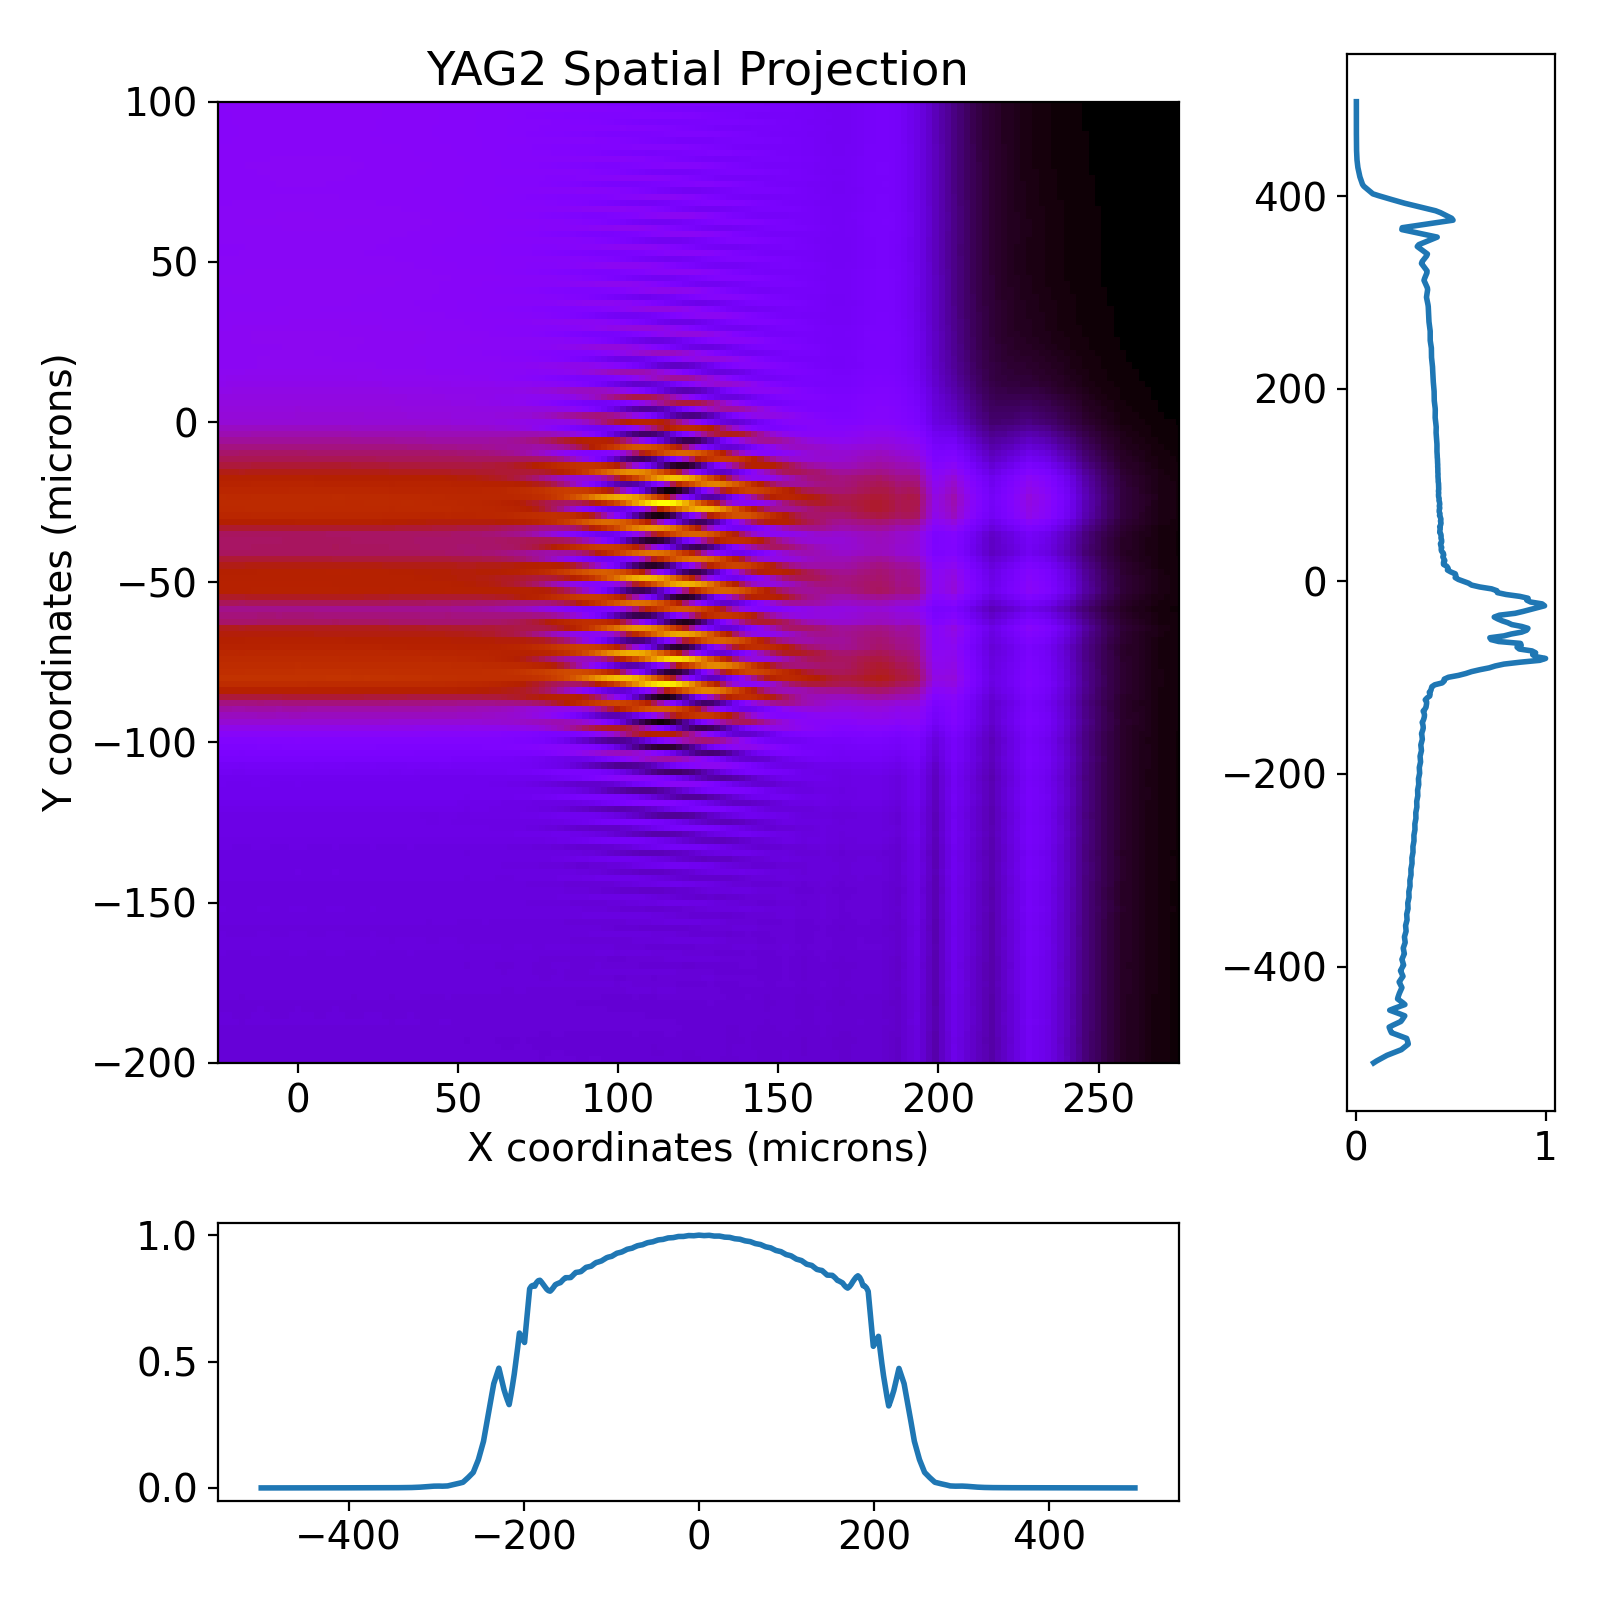

In [21]:
figure_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'
# pulse_combine.imshow_energy_slice('YAG2',slice_pos=4)
# pulse_combine.imshow_energy_slice('YAG2',slice_pos=100,dim='y')
pulse_combine.imshow_time_slice('YAG2',shift=-125)
ax_profile, ax2, ax3 = pulse_combine.imshow_projection('YAG2')
ax_profile.set_ylim(-200,100)
ax_profile.set_xlim(-25,275)
plt.tight_layout()
plt.savefig(figure_path+'+50fs_delay_10fs_FWHM_zoom.png')

<IPython.core.display.Javascript object>


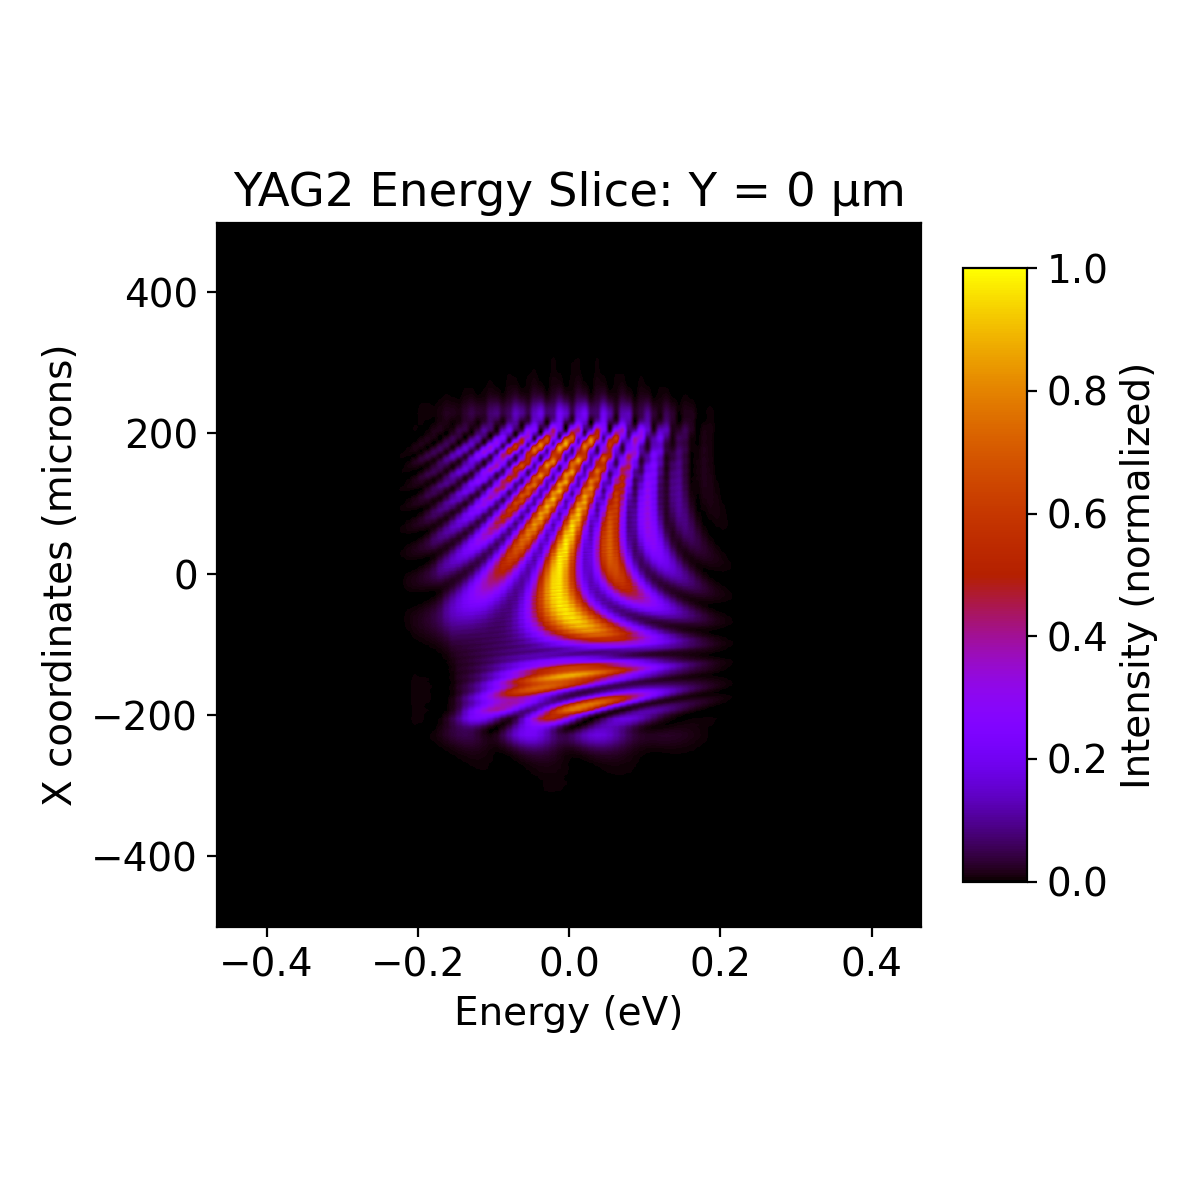

<IPython.core.display.Javascript object>


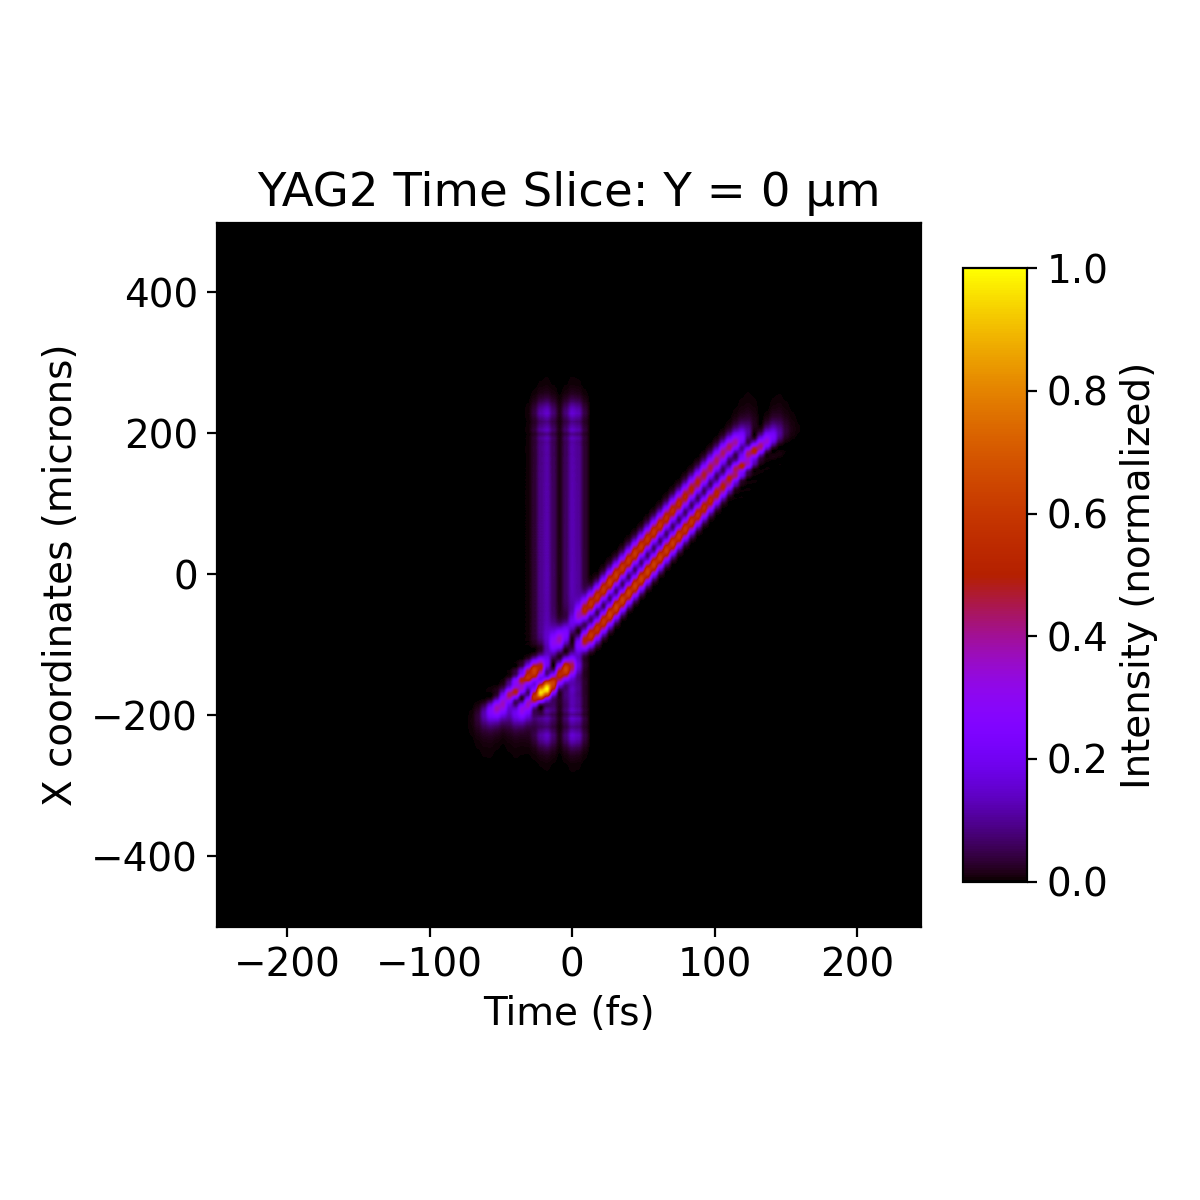

256


<IPython.core.display.Javascript object>


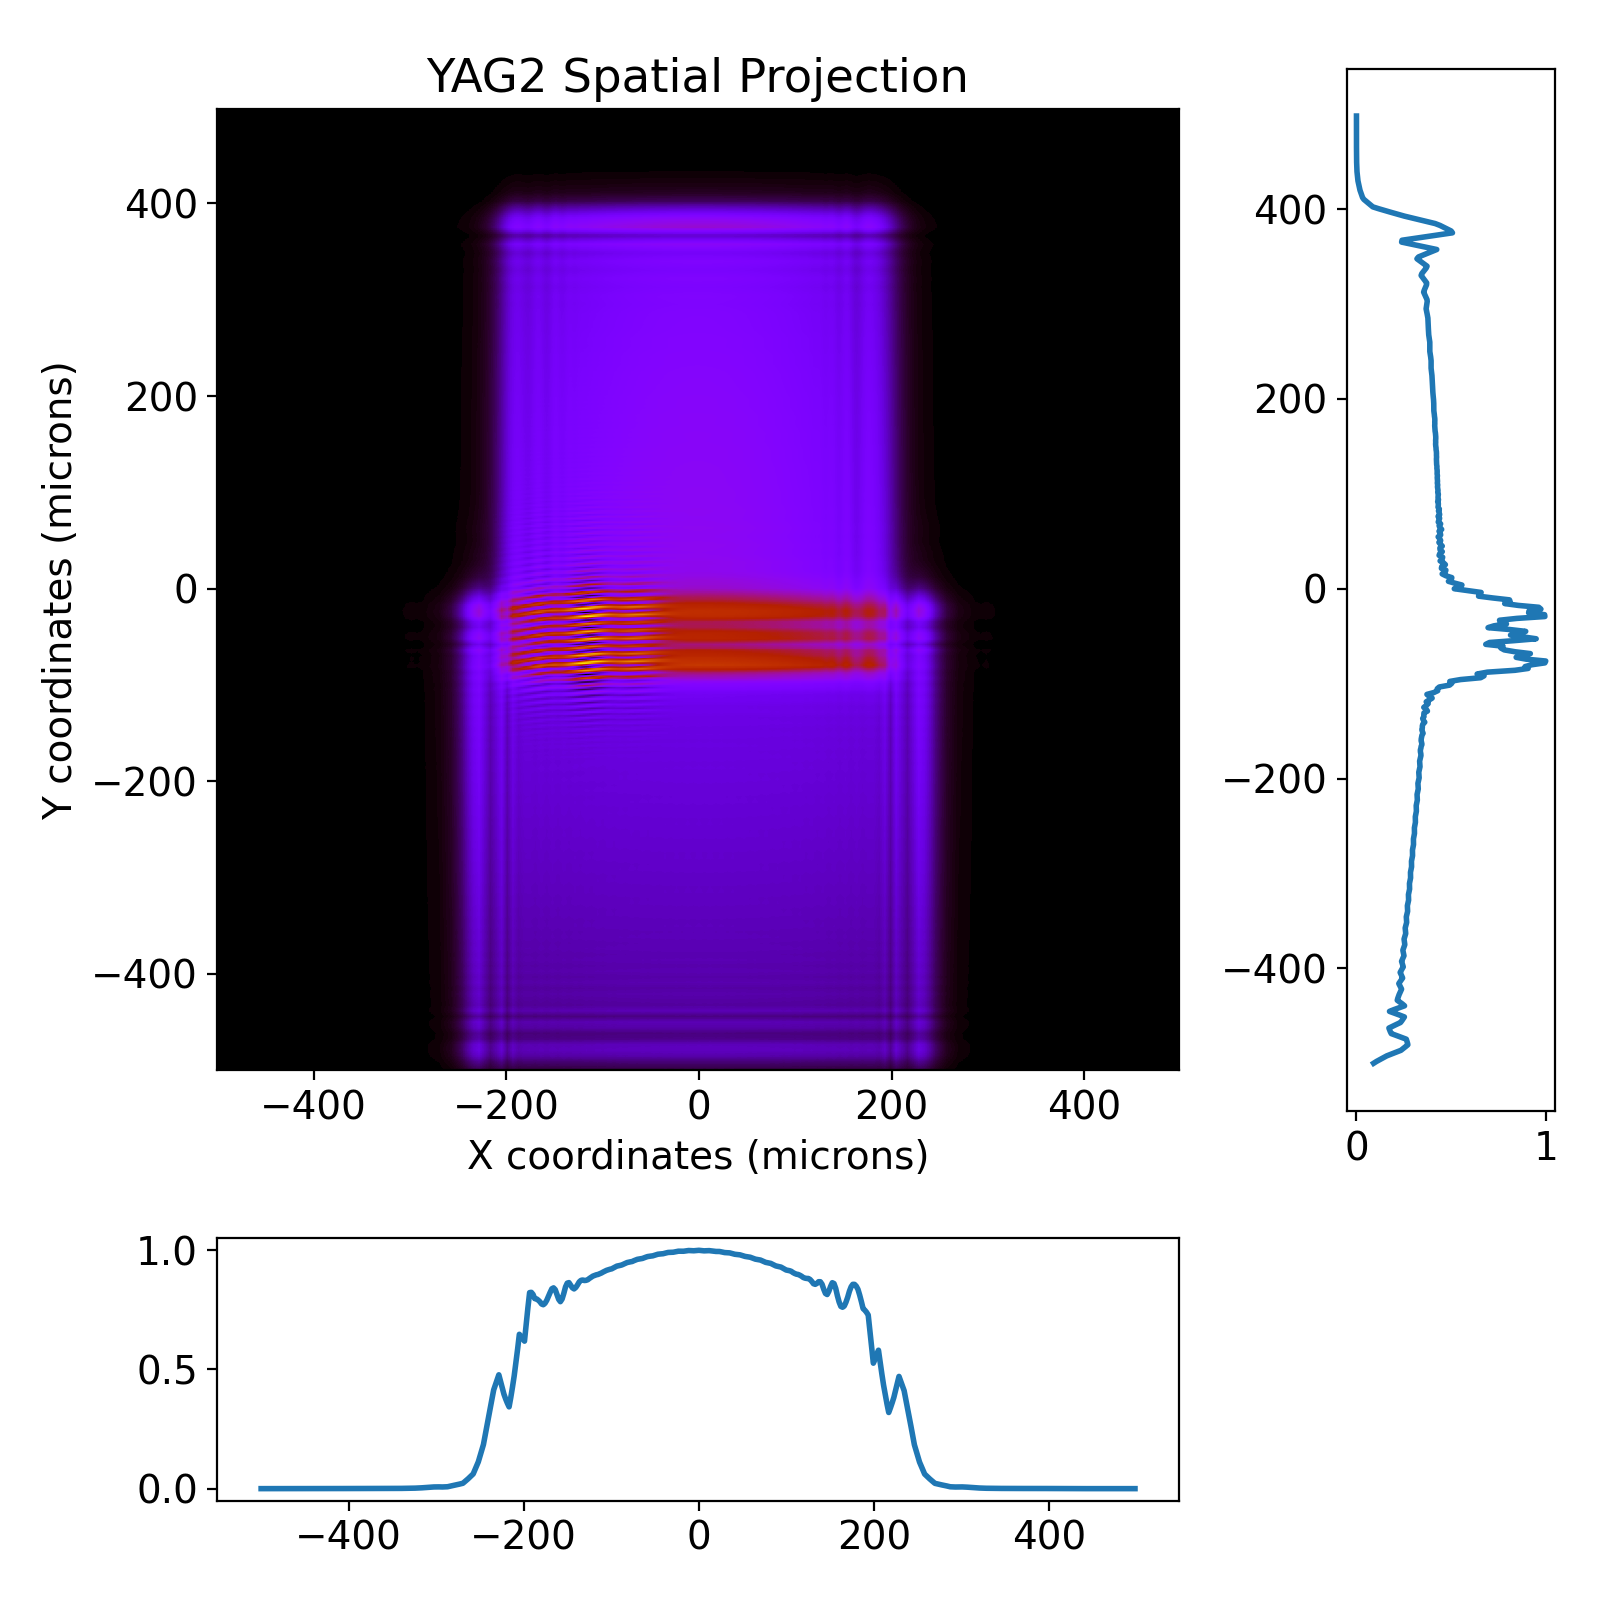

In [13]:
figure_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'
pulse_combine.imshow_energy_slice('YAG2',slice_pos=0)
# pulse_combine.imshow_energy_slice('YAG2',slice_pos=100,dim='y')
two_pulse_combine.imshow_time_slice('YAG2',shift=-125)
two_pulse_combine.imshow_projection('YAG2')
plt.tight_layout()
# plt.savefig(figure_path+'+50fs_delay_10fs_FWHM.png')

In [43]:
42/97

0.4329896907216495

<IPython.core.display.Javascript object>


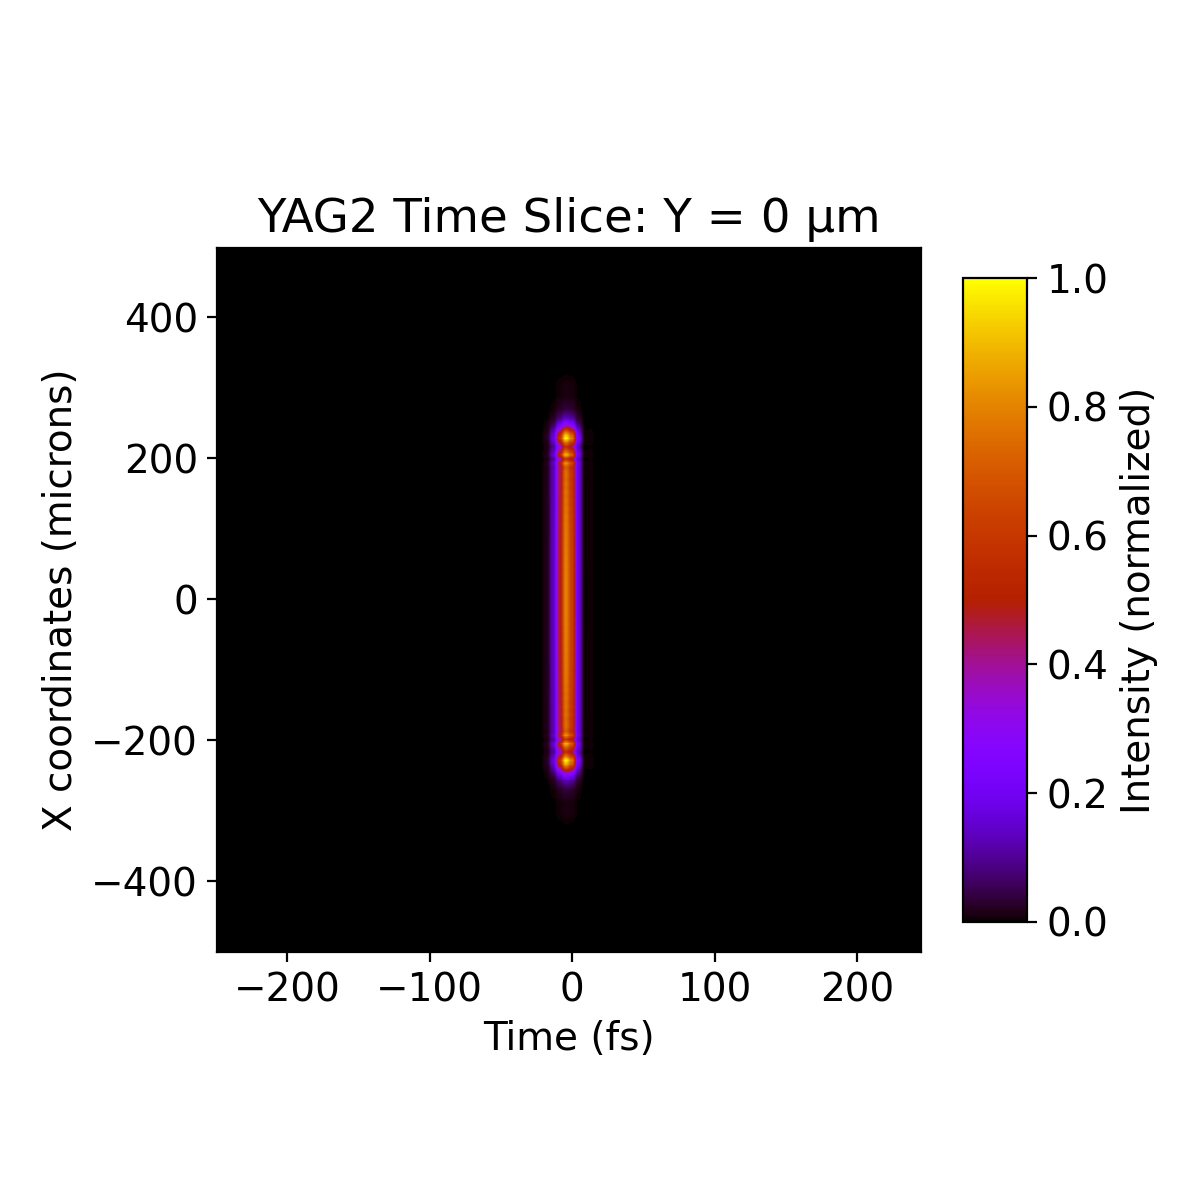

256


<IPython.core.display.Javascript object>


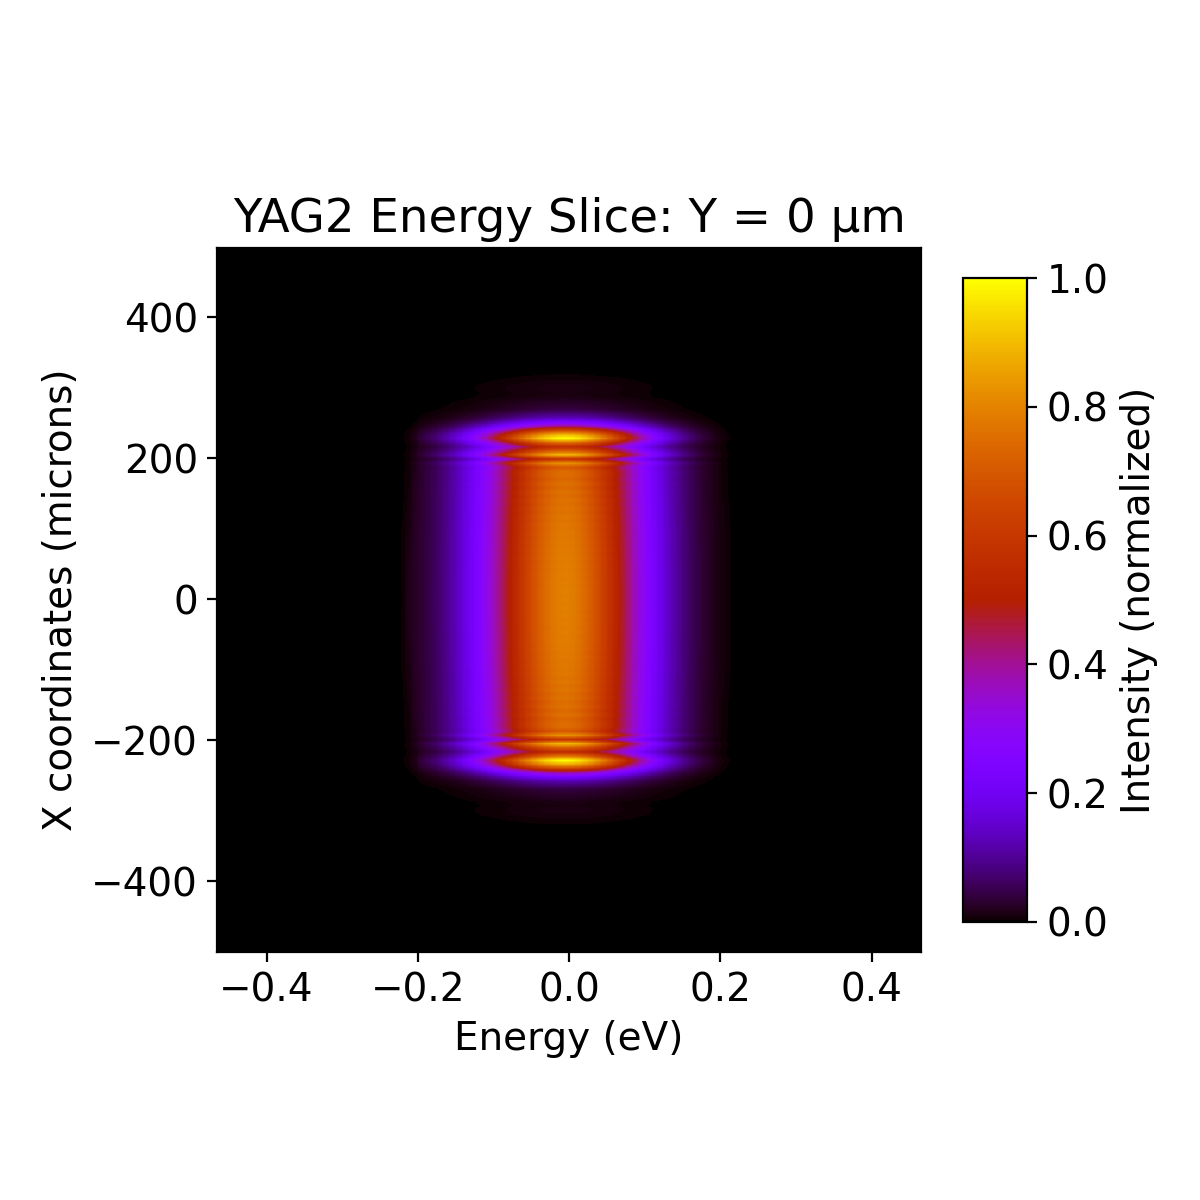

<IPython.core.display.Javascript object>


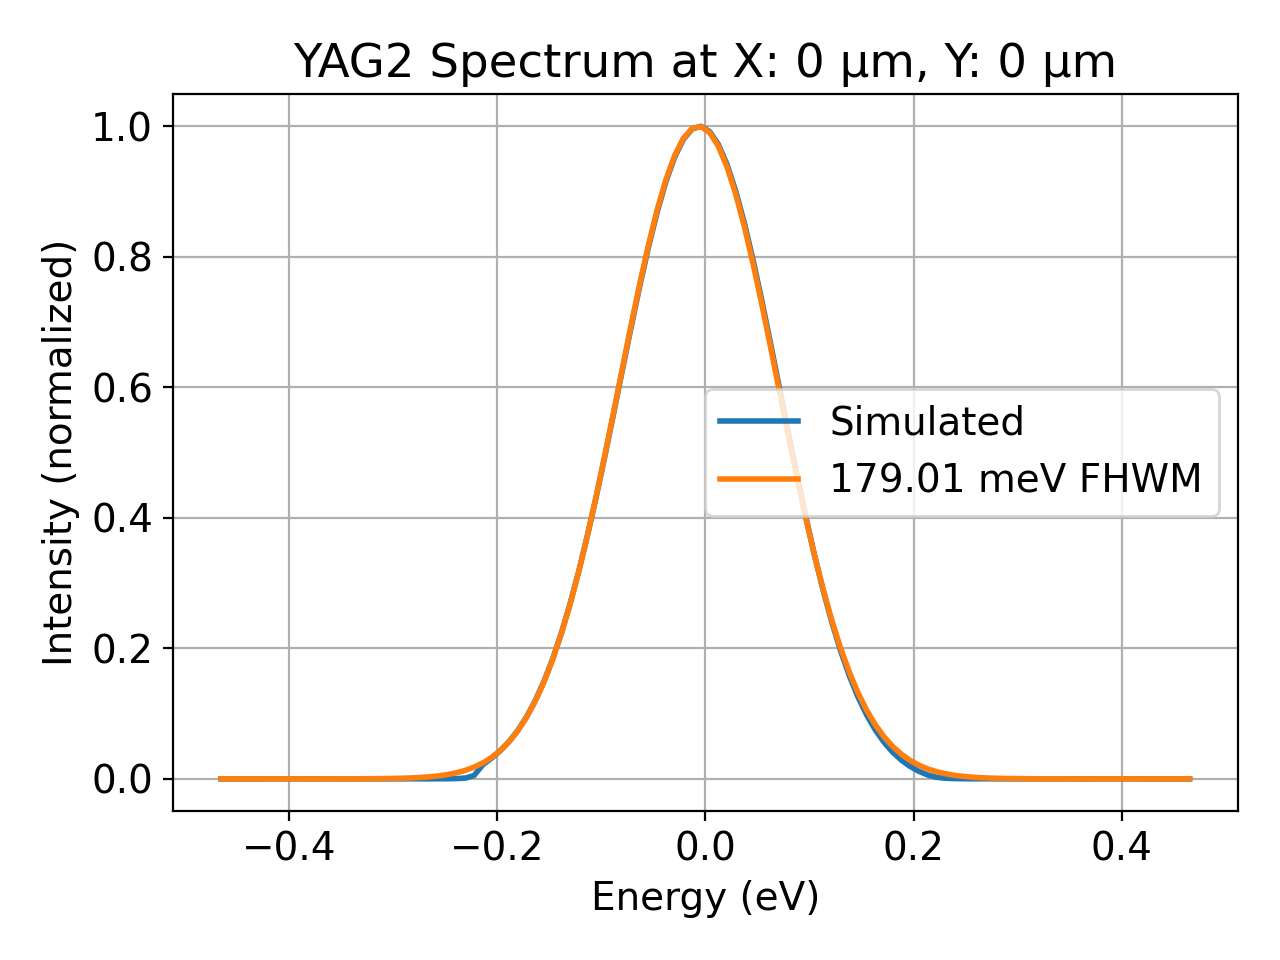

<IPython.core.display.Javascript object>


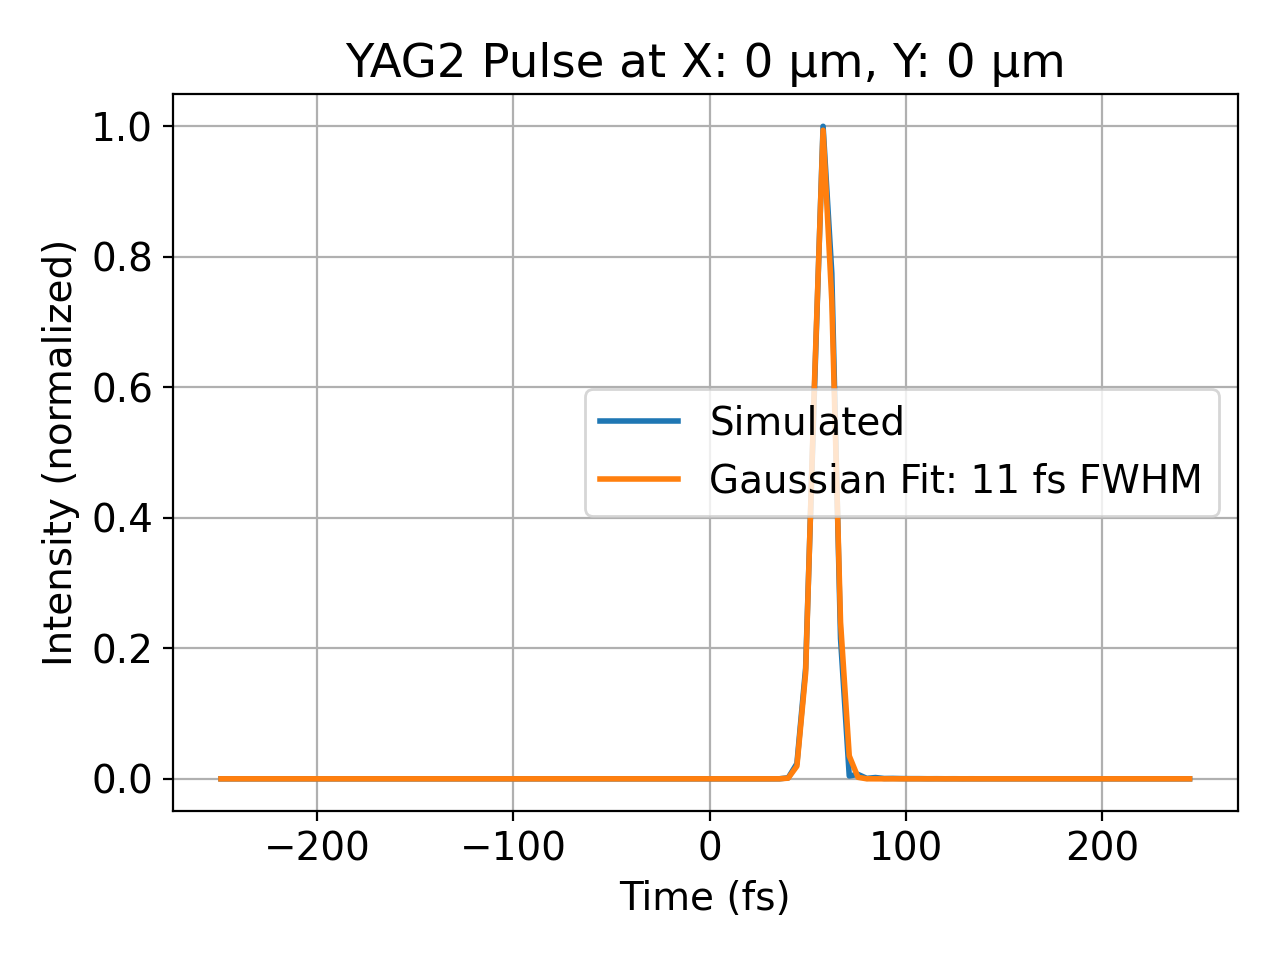

In [14]:
figure_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_cc.imshow_time_slice('YAG2', shift=-64)
plt.savefig(figure_path+'cc_time_slice.png')
# pulse_test.imshow_energy_slice('YAG1')
pulse_cc.imshow_energy_slice('YAG2')
plt.savefig(figure_path+'cc_energy_slice.png')
# pulse_test.plot_spectrum('YAG1')
pulse_cc.plot_spectrum('YAG2',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_cc.plot_pulse('YAG2')
# pulse_test.imshow_energy_slice('IP')
# pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


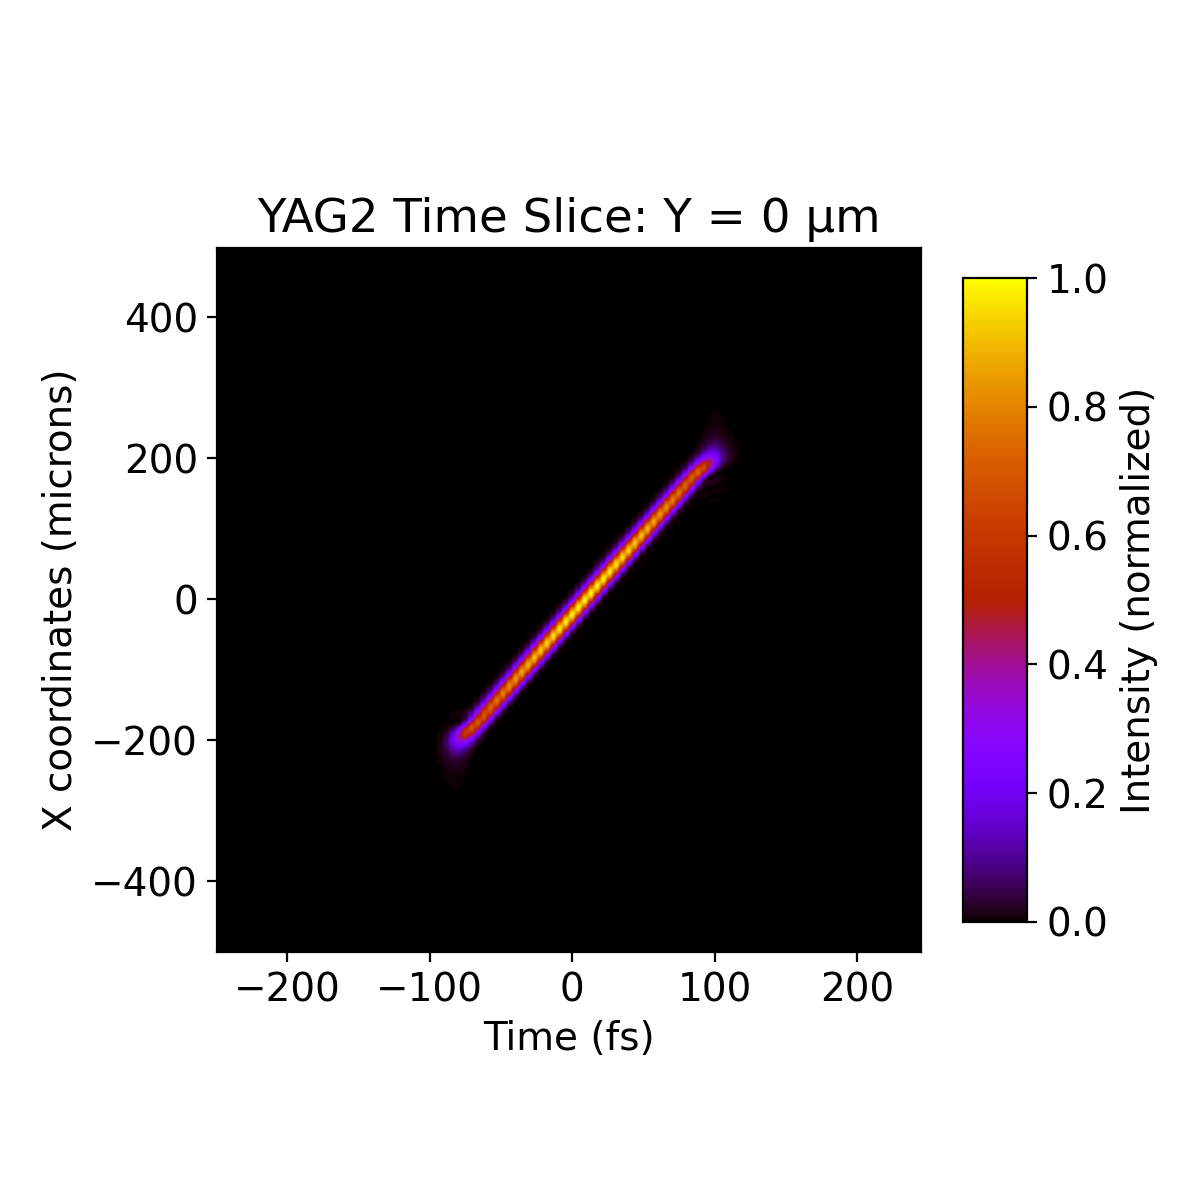

256


<IPython.core.display.Javascript object>


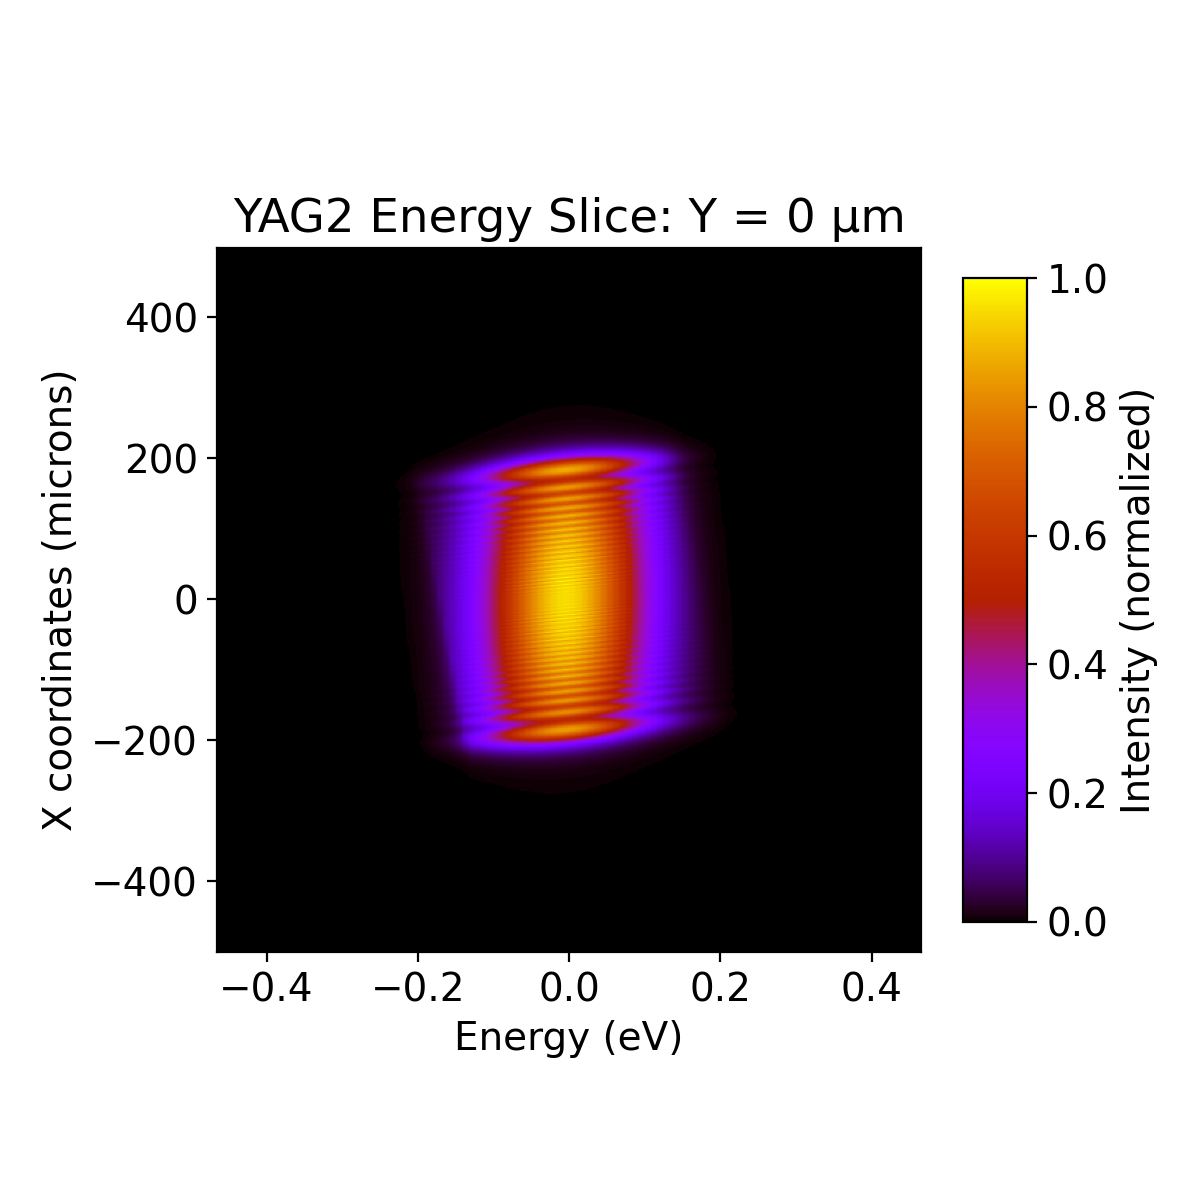

<IPython.core.display.Javascript object>


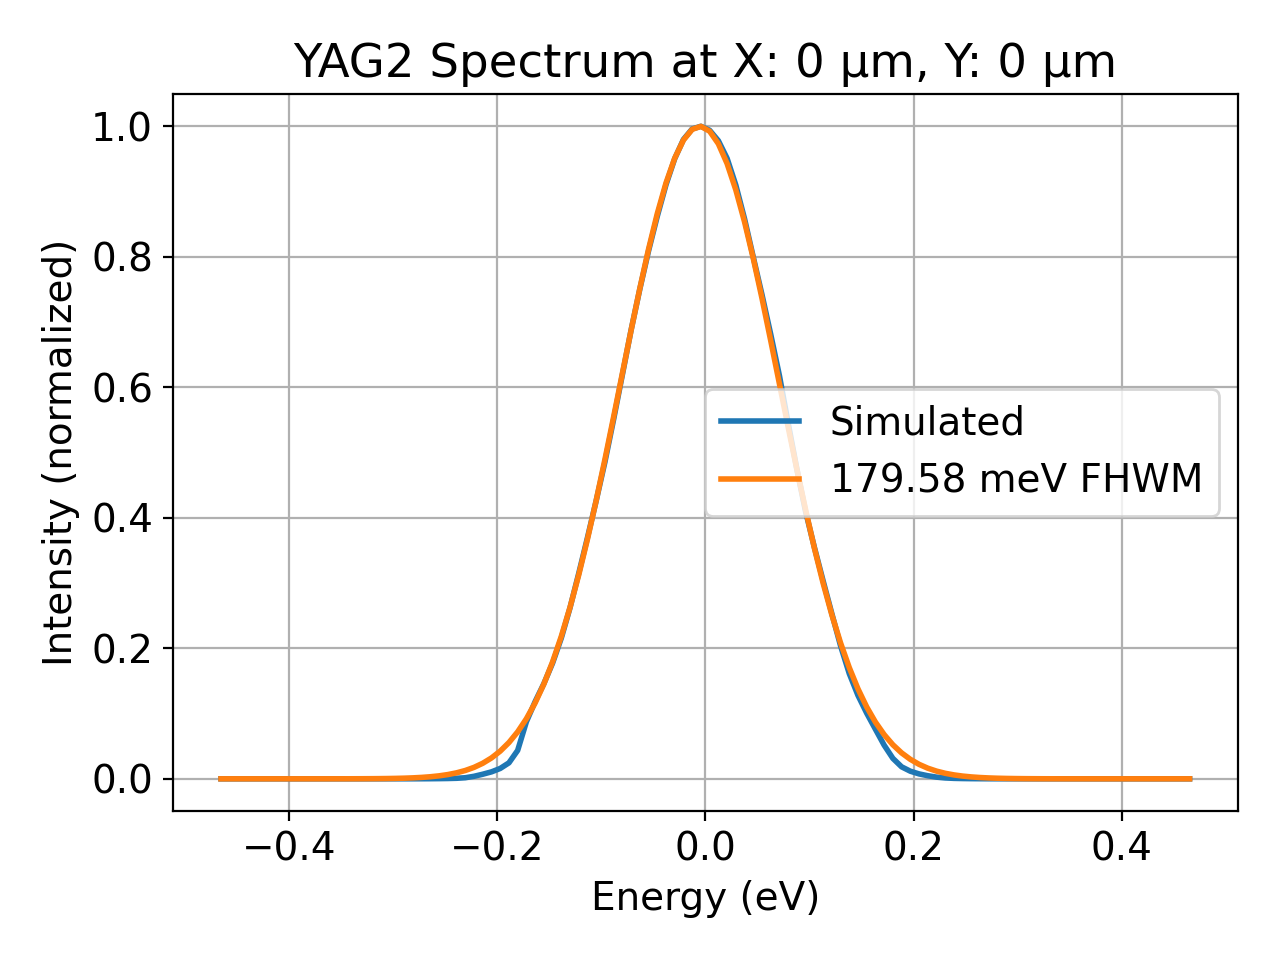

<IPython.core.display.Javascript object>


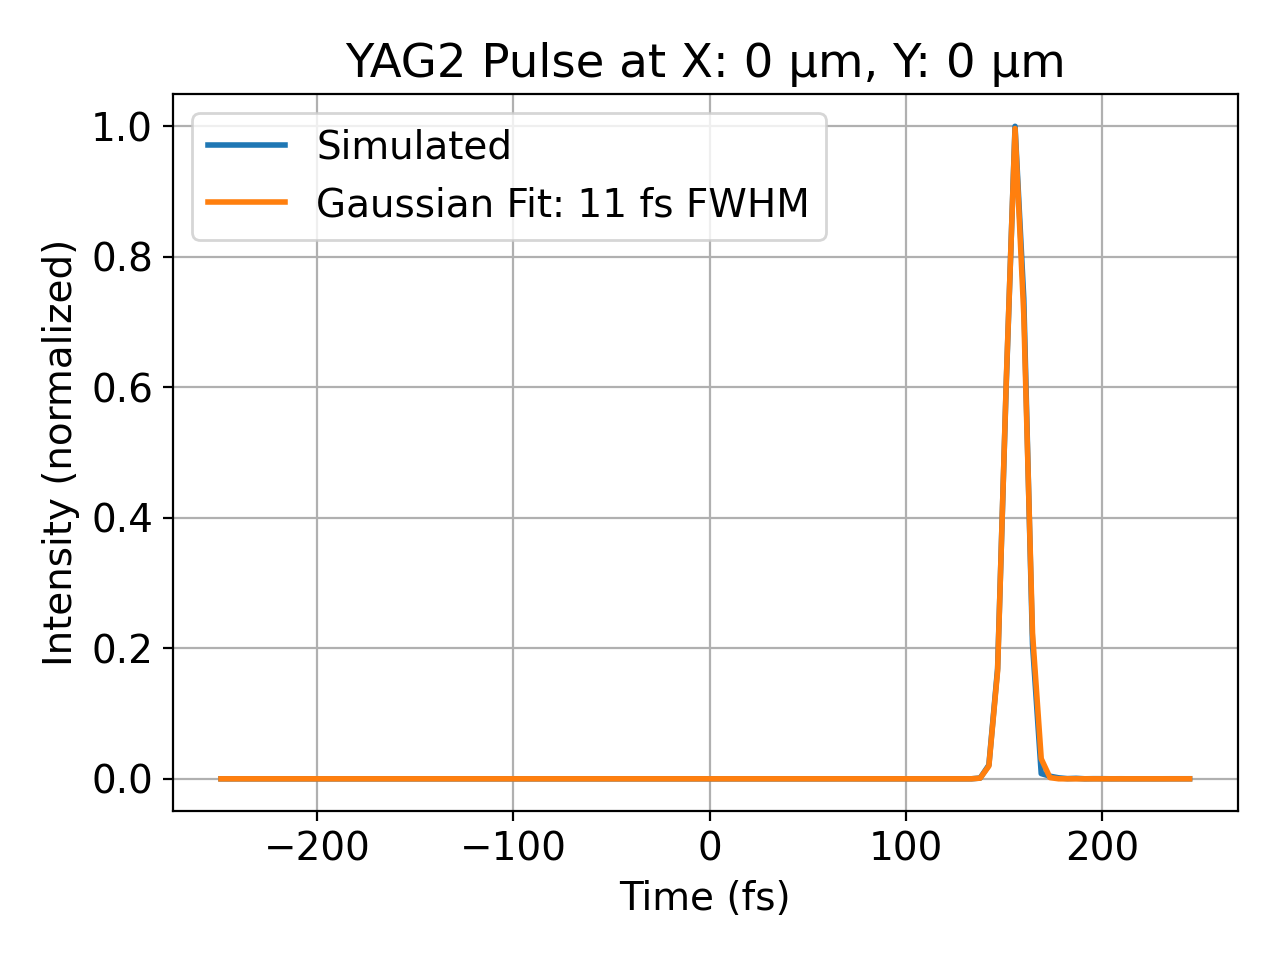

In [14]:
figure_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_vcc.imshow_time_slice('YAG2', shift=-150)
plt.savefig(figure_path+'vcc_time_slice.png')
# pulse_test.imshow_energy_slice('YAG1')
pulse_vcc.imshow_energy_slice('YAG2')
plt.savefig(figure_path+'vcc_energy_slice.png')
# pulse_test.plot_spectrum('YAG1')
pulse_vcc.plot_spectrum('YAG2',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_vcc.plot_pulse('YAG2')
# pulse_test.imshow_energy_slice('IP')
# pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


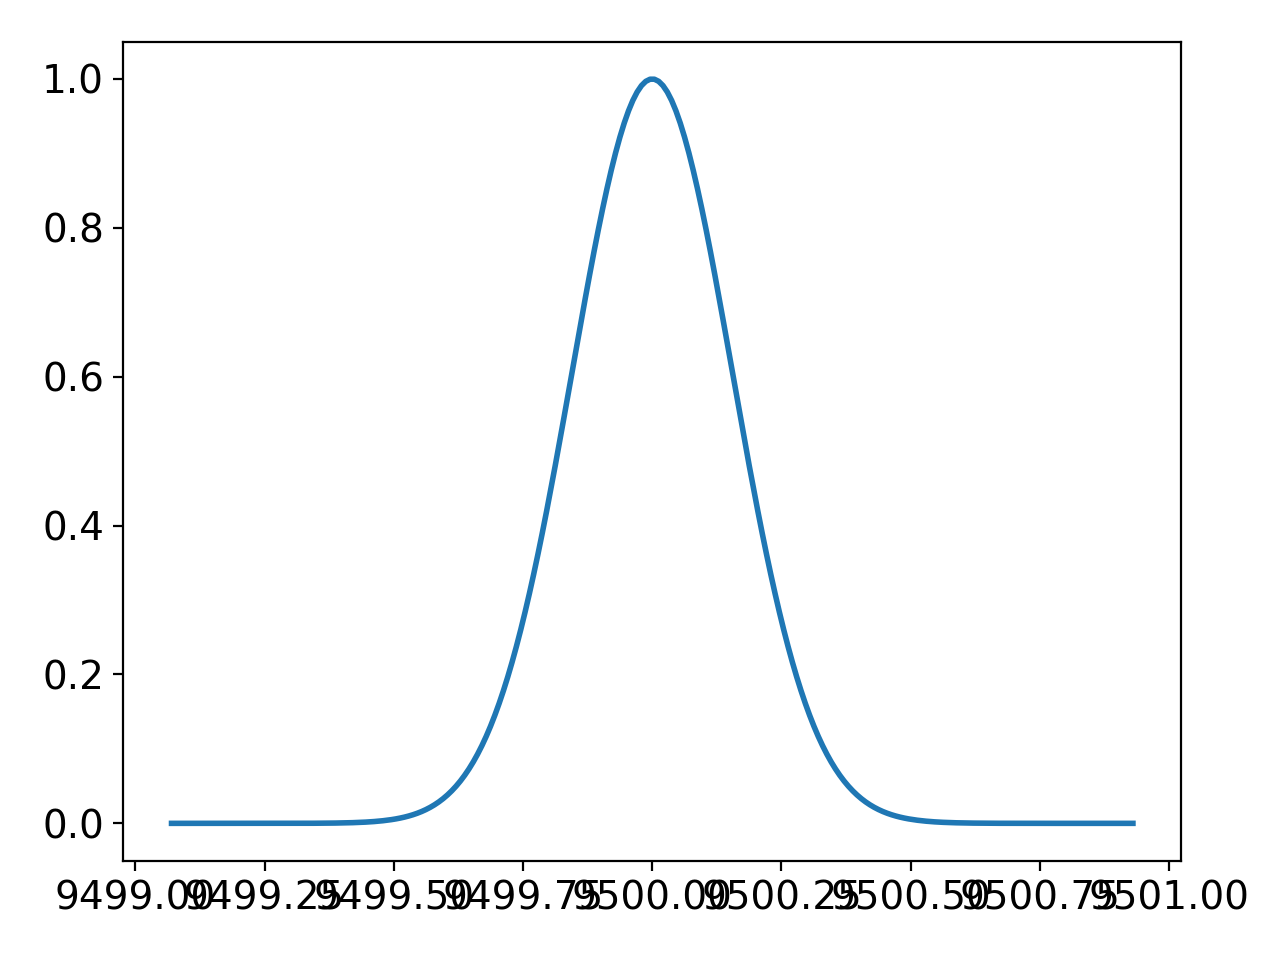

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8